# Assignment 2: ML Engineering 2

In [1]:
# enter your name and UFL email address
name = 'enter your name'
email = 'enter your email'

name = 'solution' # ###- 
email = 'solution' # ###- 

In [2]:
if name == 'enter your name' or email == 'enter your email':
    assert False, 'Enter your name & email first!'
else:
    print('Assignment 2 -- name: {}, email: {}\n'.format(name, email))
    
    # Load packages we need
    import sys
    import os
    import time

    import numpy as np
    import pandas as pd
    import sklearn

    from matplotlib import pyplot as plt
    plt.rcParams.update({'font.size': 16})

    # Let's check our software versions
    print('### Python version: ' + __import__('sys').version)
    print('### NumPy version: ' + np.__version__)
    print('### Scikit-learn version: ' + sklearn.__version__)
    print('------------')


    # load our packages / code
    sys.path.insert(1, '../common/')
    import utils
    import plots

Assignment 2 -- name: solution, email: solution

### Python version: 3.8.5 (default, Jul 28 2020, 12:59:40) 
[GCC 9.3.0]
### NumPy version: 1.19.5
### Scikit-learn version: 0.24.0
------------


In [3]:
# global parameters to control behavior of the pre-processing, ML, analysis, etc.
seed = 42

# deterministic seed for reproducibility
##rng = np.random.default_rng(seed)  # best practice but not fully implemented in scikit-learn
np.random.seed(seed)

prop_vec = [16, 2, 2]

## Part 1: Loading and Pre-processing Data

### Loading data

In [4]:
### In this case, we'll directly load the Adult dataset pre-processed in a similar way as for assignment 1
### and we'll immediately split it into train, test, validation.

train_x, train_y, test_x, test_y, val_x, val_y, features, labels = utils.load_preproc_adult(prop_vec=prop_vec, seed=seed)

In [5]:
# check that we have what we expect
print('Training: {}, {}'.format(train_x.shape, train_y.shape))
print('Test: {}, {}'.format(test_x.shape, test_y.shape))
print('Validation: {}, {}'.format(val_x.shape, val_y.shape))

Training: (36178, 88), (36178,)
Test: (4523, 88), (4523,)
Validation: (4521, 88), (4521,)


In [6]:
# print features and labels
print('Features: {}'.format(features))
print('Labels: {}'.format(labels))

# as you can see this the one-hot encoded version of the data with proper names for the columns/features.

Features: ['age', 'workclass_0', 'workclass_1', 'workclass_2', 'workclass_3', 'workclass_4', 'workclass_5', 'workclass_6', 'workclass_7', 'education-num', 'marital-status_0', 'marital-status_1', 'marital-status_2', 'marital-status_3', 'marital-status_4', 'marital-status_5', 'marital-status_6', 'occupation_0', 'occupation_1', 'occupation_2', 'occupation_3', 'occupation_4', 'occupation_5', 'occupation_6', 'occupation_7', 'occupation_8', 'occupation_9', 'occupation_10', 'occupation_11', 'occupation_12', 'occupation_13', 'relationship_0', 'relationship_1', 'relationship_2', 'relationship_3', 'relationship_4', 'relationship_5', 'race_0', 'race_1', 'race_2', 'race_3', 'race_4', 'sex_0', 'sex_1', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country_0', 'native-country_1', 'native-country_2', 'native-country_3', 'native-country_4', 'native-country_5', 'native-country_6', 'native-country_7', 'native-country_8', 'native-country_9', 'native-country_10', 'native-country_11', 'native-c

In [7]:
# Let's take a look at some rows of our training data just so we know what it looks like
print(train_x[2,:])
print(train_y[0:20])

[ 0.94207283  1.          0.          0.          0.          0.
  0.          0.          0.          1.12875281  0.          0.
  1.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          1.          0.          0.          0.
  0.          1.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          1.
  1.          0.         -0.1467332  -0.21878026  0.7547014   0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          1.          0.          0.        ]
[1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 

## [Task 1] (30 points) Let's tune hyperparameters! We will use scikit-learn in two ways to optimize hyperparameters of SVM: (1) grid search, (2) randomized search.

### [Task 1a] (10 points) Use GridSearchCV from scikit-learn to do a grid search for SVM hyperparameters. Note that this way will use cross-validation to find the best hyperparameters values and that we purposefully disable some warnings to avoid verbose output.

In [8]:
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import GridSearchCV

param_grid = {'C':[0.1, 1, 5], 'penalty': ['l1', 'l2']}
model = LinearSVC(max_iter=1000, dual=False)

# We'll use this to avoid some annoying convergence warning 
# Note: don't just do that without thinking in your own projects, warnings are there for a reason folks!
## (In this case, it's okay because it's for illustration, but obviously if the model doesn't converge in 
## some cases we may not find the true best hyperparams)
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

@ignore_warnings(category=ConvergenceWarning)
def do_grid_search(model, param_grid):
    
    # use the GridSearchCV class of scikit-learn to do a grid search on the provided grid (use 'model')
    # set accuracy as scoring function and return the output of fit() on the training data
    
    ###* put your code here (~2 lines) *###
    gs = GridSearchCV(model, param_grid, scoring='accuracy')
    return gs.fit(train_x, train_y)

gs_res = do_grid_search(model, param_grid)

### [Task 1b] (3 points) How many combination of hyperparameters were tested?

In [9]:
###* put your answer as comment here *###
#
#
# 6
### we can check using: len(gs_res.cv_results_['params'])

### [Task 1c] (2 points) What is the best combination of hyperparameters?

In [10]:
# Show the best combination of parameters found through the search 
# Hint: look at the documentation of GridSearchCV
###* put your code here (~2 lines) *###
# store this combination in 'gs_best_hyperparams' and print it
gs_best_hyperparams = gs_res.best_params_
print(gs_best_hyperparams)

{'C': 0.1, 'penalty': 'l1'}


### [Task 1d] (10 points) Use RandomizedSearchCV to do a search! We'll use a halfnormal distribution from Scipy to find values for C.

In [11]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import halfnorm

param_dist = dict(C=halfnorm(loc=0, scale=4.0), penalty=['l1', 'l2'])
model = LinearSVC(max_iter=1000, dual=False)

# We'll use this to avoid some annoying convergence warning 
# Note: don't just do that in your own projects, warnings are there for a reason!
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

@ignore_warnings(category=ConvergenceWarning)
def do_randomized_search(model, param_dist):
    # use the RandomizedSearchCV class of scikit-learn to do a randomized search (use 'model')
    # use accuracy as scoring function and return the result of fit() on the training data 
    # Also for reproducibility: set the random_state
    
    ###* put your code here (~2 lines) *###
    rs = RandomizedSearchCV(model, param_dist, scoring='accuracy', random_state=seed)
    return rs.fit(train_x, train_y)

rs_res = do_randomized_search(model, param_dist)

### [Task 1e] (1 points) What is the best combination of hyperparameters?

In [12]:
# Show the best combination of parameters found through the randomized search 
###* put your code here (~1 line) *###
rs_res.best_params_

{'C': 1.2756087387575334, 'penalty': 'l1'}

### [Task 1f] (4 points) What are the pros and cons of a randomized search? Explain your answer. (A few sentences is okay.)

In [13]:
# what do you think are the pros and cons of a randomized search?
###* put your answer as comment here *###
#
#
#
# Pros: it can discover hyperparameter values that you can't think of, in a way it's more principled to sample from a distribution
# Cons: it requires making additional assumptions (about distributions, etc.). Also, because it's randomized, you may or may not get lucky...
#

## [Task 2] (10 points) Let's train the model and evaluate it!

In [14]:
# Evaluate the models
# complete the function to calculate accuracy
def model_accuracy(model, x, true_y):
    ###* put your code here *###
    pred = model.predict(x)
    return np.sum(pred == true_y) / true_y.shape[0]

def evaluate_model(name, model, train_x, train_y, val_x, val_y):
    train_acc = model_accuracy(model, train_x, train_y)
    val_acc = model_accuracy(model, val_x, val_y)
    print('{}: \n\t--- Training accuracy: {:.2f}%, Validation accuracy: {:.2f}%'.format(name, train_acc*100, val_acc*100))
    return

###* put your code here (~1 line) *### 
### Train a LinearSVC using the best hyperparameters found during the grid search in Task 1
### In addition you should also use: max_iter=10000, dual=False
### Use the training data (train_x, train_y)
### Hint: there is a way to pass the best hyperparameters object from Task 1b directly to the model object (i.e., without passing it one hyperparameter at a time)
svm = LinearSVC(**gs_best_hyperparams, max_iter=10000, dual=False).fit(train_x, train_y)


evaluate_model('LinearSVC(w/ best grid search hyperparams {})'.format(gs_best_hyperparams), 
               svm, train_x, train_y, val_x, val_y)

LinearSVC(w/ best grid search hyperparams {'C': 0.1, 'penalty': 'l1'}): 
	--- Training accuracy: 84.99%, Validation accuracy: 84.67%


## [Task 3] (30 points) Manual Hyperparameter Optimization (i.e., without using scikit-learn's to do the search for us)!

### [Task 3a] (10 points) Complete the code below to do a grid search manually. In this case you cannot use GridSearchCV, you must train and evaluate the model on each combination of hyperparameter values.

In [15]:
## we are allowed to use the following from scikit-learn
from sklearn.model_selection import ParameterGrid 
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

hyperparams_vals = {'weights': ['uniform', 'distance'],
                    'metric': ['euclidean', 'chebyshev'],
                    'n_neighbors': [1, 3, 5, 7, 11, 51]}

grid = ParameterGrid(hyperparams_vals)

trsub_size = 5000
trsub_x = train_x[:trsub_size,:]
trsub_y = train_y[:trsub_size]

## iterate over the entire grid. In each case, train a KNN classifier with the given hyperparameters (on the training subset 'trsub')
# and measure accuracy on both the training subset data and the validation data!
# note: we use a subset of the training data to speed up the process a bit
for i, hyperparams in enumerate(list(grid)):
    
    ###* put your code here  (~ 5 lines) *###
    ### In each iteration of the loop you should train a KNeighborsClassifier using 'hyperparams' as hyperparameters
    ### You should train the model on 'trsub_x' and 'trsub_y'!
    ### Once your model is trained, compute the accuracy on trsub (training accuracy) and on val (validation accuracy) 
    ### store the results in 'train_acc' and 'val_acc' respectively
    model = KNeighborsClassifier(**hyperparams).fit(trsub_x, trsub_y)

    pred_y = model.predict(trsub_x)
    train_acc = accuracy_score(trsub_y, pred_y)
    
    pred_y = model.predict(val_x)
    val_acc = accuracy_score(val_y, pred_y)
    
    ## This will print information about the grid search as it progresses
    print('Iter {}, hyperparams: {}\n \t-> train accuracy: {:.2f}%, val accuracy: {:.2f}%'.
              format(i, hyperparams, 100*train_acc, 100*val_acc))

Iter 0, hyperparams: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
 	-> train accuracy: 99.50%, val accuracy: 79.25%
Iter 1, hyperparams: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}
 	-> train accuracy: 99.50%, val accuracy: 79.25%
Iter 2, hyperparams: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
 	-> train accuracy: 89.68%, val accuracy: 81.55%
Iter 3, hyperparams: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
 	-> train accuracy: 99.52%, val accuracy: 80.80%
Iter 4, hyperparams: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
 	-> train accuracy: 87.40%, val accuracy: 81.84%
Iter 5, hyperparams: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
 	-> train accuracy: 99.52%, val accuracy: 81.13%
Iter 6, hyperparams: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
 	-> train accuracy: 87.00%, val accuracy: 82.11%
Iter 7, hyperparams: {'metric': 'euclidean', 'n_neig

### [Task 3b] (5 points) Answer the following questions. (A few sentences is fine.)
### What combination of hyperparameters would you use and why? Is the training accuracy useful when doing hyperparameter tuning? Why or why not?

In [16]:
# What combination of hyperparameters would you use and why?
###* put your answer as comment here *###
#
#
# Iter 10, hyperparams: {'metric': 'euclidean', 'n_neighbors': 51, 'weights': 'uniform'}
#    -> train accuracy: 84.14%, val accuracy: 82.84%
# This avoids overfitting badly but also gives us decent validation accuracy.            

In [17]:
# Is the training accuracy useful when doing hyperparameter tuning? Why or why not?
###* put your answer as comment here *###
#
# 
# Yes, absolutely. We care most about the validation accuracy
# (since ML is about making accurate out-of-sample predictions), but
# everything else being equal we don't want a model that badly overfits!

### [Task 3d] (10 points) Answer the following questions. (A few sentences is fine.)
### Observe what happens when weights changes from 'uniform' to 'distance'? Provide a plausible explanation for this.

In [18]:
# What do you observe in terms of the training and validation accuracies when the weights change from 'uniform' to 
# 'distance'?
###* put your answer as comment here *###
#
#
# 'uniform' doesn't overfit as much as 'distance'


## provide a plausible explanation for this phenomenon.
###* put your answer as comment here *###
#
#
# This makes sense because all the neighbors are given an equal vote for 'uniform'
# as opposed to a vote based on their distance (for 'distance')!


## If you were to train a KNN model would you set weights to 'uniform' or 'distance'? Why?
###* put your answer as comment here *###
#
#
# The pragmatic answer would be it depends; if 'uniform' and 'distance' give about the same validation accuracy
# then it would make sense to use 'uniform' to avoid overfitting. If 'uniform' causes us to underfit and have much
# lower validation accuracy, then we would pick 'distance' even if it might overfit
# (The reason is that ML is about making accurate out-of-sample predictions, not overfitting is nice but not as important)
#

### [Task 3e] (5 points) Which hyperparameters (if any) have a significant impact on overfitting and why?

In [19]:
### According to the grid search you just performed, which hyperparameters seem to have significant impact on overfitting and why.
## Explain your reasoning and justify your answer!
###* put your answer as comment here *###
#
#
# 'n_neighbors' and 'weights' which makes sense. 
# 'metric' does not seem to impact overfitting (though it clearly impact prediction accuracy)!
#

## [Task 4] (30 points) Exploring Bias & Variance, Underfitting & Overfitting

### For this task, you *must* only use models (kNN or SVM) and hyperparameters that we have seen/used somewhere in this assignment!

### [Task 4a] (5 points) What is the irreducible error for this prediction task (income >=50k or <50k on Adult data)? Explain your reasoning.

In [20]:
###* put your answer as comment here *###
#
#
# We don't know. In general we cannot know the irreducible error.
# However, in this case we have seen that we can train a model (SVM) with about 85% val accuracy. So we know that the
# irreducible error cannot be more than 15% (measured as 1-accuracy), but again we have no way to know the exact value!
#
# In fact, I have never seen better results on Adult than around 86% or 87% (on a neural network).
# This suggests that irredicible error is probably around 12-13%...
# But maybe there exists a model & combination of hyperparameters we haven't tried that achieves 99% test accuracy!

### For the rest of Task 4, we will assume that irreducible error (in the scale 1 - accuracy) is about 15%

### [Task 4b] (5 points) Train a high bias, low variance model. Show *and* explain why the model has high bias and low variance!

In [21]:
###* Put your code here *###
model = SVC(C=0.00001, kernel='linear').fit(train_x, train_y)

evaluate_model('High bias, low variance', model, train_x, train_y, val_x, val_y)

###* put your answer as comment here *###
#
#
# This model has high bias because it assumes linear decision boundary and further constraints 
# the model by having a very low C (regularization constant) which means the model is too highly regularized
# The training accuracy is only 75% which is 10% lower than the best we could get under our assumption that irreducible error is 15%
# We can also see that there is only a small difference between validation accuracy and training accuracy (which indicates low variance).

High bias, low variance: 
	--- Training accuracy: 75.39%, Validation accuracy: 74.19%


### [Task 4c] (5 points) Train a low bias, high variance model. Show *and* explain why the model has low bias and high variance!

In [22]:
###* Put your code here *###
model = KNeighborsClassifier(n_neighbors=1).fit(train_x, train_y)

evaluate_model('Low bias, high variance', model, train_x, train_y, val_x, val_y)

###* put your answer as comment here *###
#
#
# This model has low bias because it's a kNN with k=1 so it can basically capture whatever complexity in the relationship between features and label.
# It has 98%+ training accuracy but a much lower validation accuracy. This indicates high variance.
# Intutively the lower k is the lower the bias, but also the lower k is the higher the variance.
# 
# Note: there is an exact derivation of the bias-variance tradeoff for kNN and it shows
# that bias increases (monotonically) as k increases, and that variance decreases (monotonically) as k increases!

Low bias, high variance: 
	--- Training accuracy: 98.26%, Validation accuracy: 80.18%


### [Task 4d] (5 points) Train a low bias, low variance model. Show *and* explain why the model has low bias and low variance!

In [23]:
###* Put your code here *###
model = SVC(C=0.01, kernel='linear').fit(train_x, train_y)

evaluate_model('Low bias, low variance', model, train_x, train_y, val_x, val_y)

###* put your answer as comment here *###
#
#
#
# This is very similar to what we used for Task 4b but the regularization constant is 100 times larger. 
# So it is still low variance (and this can seen by observing the training accuracy)
# However, in this case one could argue that it's low bias because even though the model complexity is rather low 
# (it's assuming a linear decision boundary) it achieves closes to the maximum accuracy possible 
# given our assumption of an irreducible error around 15%.

Low bias, low variance: 
	--- Training accuracy: 84.95%, Validation accuracy: 84.36%


### [Task 4e] (5 points) Can you train a high bias, high variance model. If so how? If not why not?

In [24]:
###* put your answer as comment here *###
#
#
# That's difficult given the constraint of using models/hyperparameters we have used in this assignment
# If we use kNN we could have high variance by setting a low k but then we'd necessarily have low bias
# If we use SVM it's hard to get high variance even if we set C to be very large 
# and even then we don't necessarily get high bias...
#

### [Task 4f] (5 points) Train a badly *underfitted* model. The accuracy should be below 55%!

In [25]:
###* Put your code here *###
sz = 32
model = SVC(C=1000, kernel='linear', max_iter=1).fit(train_x[:sz], train_y[:sz])

evaluate_model('Badly underfitted', model, train_x[:sz], train_y[:sz], val_x, val_y)

###
### the key idea here is that if we train a very little data and we stop the training way too early (using max_iter)
### then we'll underfit for sure!

Badly underfitted: 
	--- Training accuracy: 40.62%, Validation accuracy: 27.78%


/home/vbindsch/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


## [CIS6930 Additional Task -- Task 5] (25 points): Variance, Overfitting, Agreement Rate

### Suppose we have two models and want to compare them and instead of comparing them in terms of how good the models are, we care about whether the models have learned a similar relationship between features and label? One way we can measure this is using agreement rate: we use both models to make predictions on a separate dataset and then measure what proportion of those predictions are identical.

### Variance is the tendency to learn non-existing/wrong relationships between features and labels based on the idiosyncracies of the training data. So intuitively, if two models are trained on disjoint but randomly selected subsets of the training data, then if the variance is high the agreement rate between the two models should be low. So, we can try to measure variance by measuring agreement rate. But does this work? This is what you will explore experimentally in this task. (Note that overfitting and variance are related but are not the same thing.)

### [Task 5a] (5 points) Implement an overfitting measure and the agreement rate metric.

In [26]:
### We'll define two metrics, one for overfitting and the other for agreement rate

## for this assignment we define overfitting measure as the max between 0 and 
## the difference between training accuracy and validation accuracy
def overfitting_measure(train_acc, val_acc):
    ###* put your code here (~1 line) *###
    ### your code should return the maxmimum between: 0 and training accuracy - validation accuracy
    return np.maximum(0, train_acc - val_acc)


## the agreement rate is the proportion of identical prediction of both models on a separate dataset
## note: we don't care if the predictions are correct, we only care how often they are the same!
def agreement_rate(m1_preds, m2_preds):
    assert m1_preds.shape == m2_preds.shape
    
    ###* put your code here (~1 line) *###
    ### your code should return the proportion of identical predictions in m1_preds and m2_preds
    ### note: the agreement rate is a value in [0, 1] so make sure your code returns values in the same range!
    return np.sum(m1_preds == m2_preds) / m1_preds.shape[0]

In [27]:
from sklearn.base import clone

def eval_accuracy(model, train_x, train_y, val_x, val_y):
    train_acc = model_accuracy(model, train_x, train_y)
    val_acc = model_accuracy(model, val_x, val_y)
    
    return train_acc, val_acc

def measure_overfitting_agreement(model, train_x, train_y, trsz, val_x, val_y):
    m1 = clone(model)
    m2 = clone(model)
    
    n = train_x.shape[0]
    assert n/2 >= trsz and trsz > 0
    
    rng = np.random.default_rng()
    pi = rng.permutation(n)
    pi1 = pi[0:trsz]
    pi2 = pi[trsz:2*trsz]
    
    m1.fit(train_x[pi1], train_y[pi1])
    m2.fit(train_x[pi2], train_y[pi2])
    
    train_acc, val_acc = eval_accuracy(m1, train_x[pi1], train_y[pi1], val_x, val_y)
    m1_overfit =  overfitting_measure(train_acc, val_acc)
    
    train_acc, val_acc = eval_accuracy(m2, train_x[pi2], train_y[pi2], val_x, val_y)
    m2_overfit =  overfitting_measure(train_acc, val_acc)
    
    m1_val_pred = m1.predict(val_x)
    m2_val_pred = m2.predict(val_x)
    
    agr = agreement_rate(m1_val_pred, m2_val_pred)
    
    # for this task, we'll define our our overfitting measure as 
    # the average of the overfitting measure of the two models
    overfit = (m1_overfit + m2_overfit)/2.0 
    
    return overfit, agr

### [Task 5b] (10 points) Train SVM models on random subsets of the data with different C (regularization constant) and two different size for the training data. In each case, use measure_overfitting_agreement() defined above to train the models and compute overfitting and agreement.

In [28]:
Cs = np.logspace(-2,3,200)
training_sizes = [100, 200]

###* put your code here *###
### your code should use 'SVC(C=<value from Cs>, kernel='linear')' as model instances
### You should invoke measure_overfitting_agreement() to get the agreement rate and overfitting measure (do this for all Cs and both training sizes)
### and store the results in some array(s) of your choice so that you can plot this for Task 5c

xy2 = np.zeros((Cs.shape[0] * len(training_sizes), 2))
j = 0
for k, train_sz in enumerate(training_sizes):
    for i, C in enumerate(Cs):

        model = SVC(C=C, kernel='linear')
        overfit, agr = measure_overfitting_agreement(model, train_x, train_y, train_sz, val_x, val_y)

        xy2[j,:] = [overfit, agr]
        j += 1

### [Task 5c] (5 points) Plot overfitting vs disagreement rate as a scatter plot for both training sizes

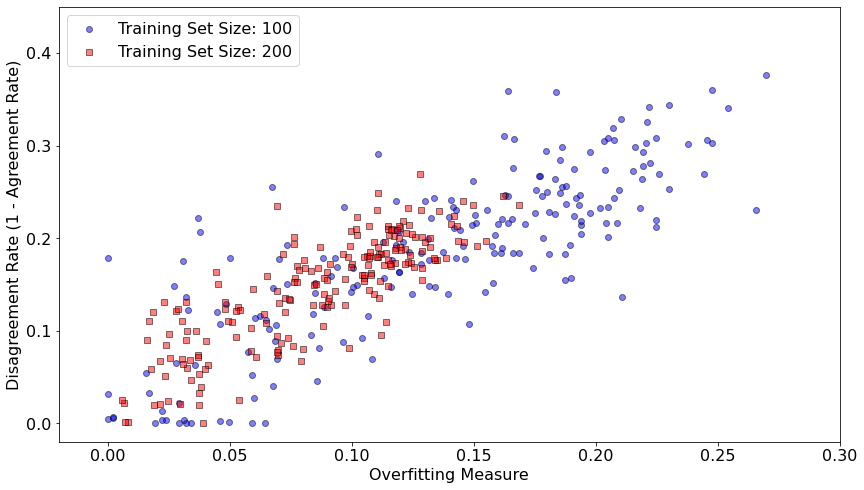

In [29]:
### Use matplotlib and supplement the provided code so it produces a single scatter plot of the two training set sizes
### with overfitting on the x-axis and *disagreement* (i.e., 1 - agreement rate) on the y-axis.
fig, ax = plt.subplots(figsize=(14,8))

###* put your code here (~2 lines) *###
### Invoke plt.scatter() first for Training Set Size: 100 with blue circle marker.
### Invoke plt.scatter() first for Training Set Size: 200 with red square marker.
plt.scatter(xy2[:Cs.shape[0],0], 1-xy2[:Cs.shape[0],1], c='b', marker='o', edgecolor='k', alpha=0.5, label='Training Set Size: {}'.format(training_sizes[0]))
plt.scatter(xy2[Cs.shape[0]:,0], 1-xy2[Cs.shape[0]:,1], c='r', marker='s', edgecolor='k', alpha=0.5, label='Training Set Size: {}'.format(training_sizes[1]))

## sets the axis labels, limits, etc.
plt.xlabel('Overfitting Measure')
plt.ylabel('Disagreement Rate (1 - Agreement Rate)')
plt.xlim([-0.02, 0.3])
plt.ylim([-0.02, 0.45])

plt.legend(loc='upper left')
plt.show()

### [Task 5d] (5 points) What do you conclude?

In [30]:
# What do you conclude? Is agreement rate a possible way to measure overfitting? Can it be used to measure variance?
# Describe your general observation of the correlation between these measures.
# Hint: there is no single 'right' answer here, but there are many wrong answers!
###* put your answer as comment here *###
#
#
#
# We see that there is definitely a strong positive linear correlation between our overfitting measure and the disagreement rate.
# However, the relationship isn't perfect correlation. The relationship is stronger for training size 100 (as expected perhaps as it overfits more!)
# Also, it's not clear that this relationship would hold for other models or for SVM but with different hyperparameter values...
# So yes: it could potentially be a way to measure overfitting/variance, but we do not have enough experimental data to make any strong conclusions yet.
#

# the code below shows the correlation
mxy = xy2.copy()
mxy[:,1] = 1.0 - mxy[:,1]
print('Correlation coef: {:.4f}'.format(np.corrcoef(mxy[:Cs.shape[0]], rowvar=False)[0,1]))
print('Correlation coef: {:.4f}'.format(np.corrcoef(mxy[Cs.shape[0]:], rowvar=False)[0,1]))

Correlation coef: 0.8189
Correlation coef: 0.8263
